# Logistic Regression Task 

### Data Link
- https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#
    
Task Logistic Regression

1. WAP to read folder name and make a label in the csv with folder name
2. Remove unneccesarry info in Automated way
3. No other algorithm must be used other than Logistic Regression
4. Try to utilize multiple solvers and make multiple models
5. Provide the best models
6. EDA and all must be done accordingly

Note: No manual approaches will be appreciated

### Importing Required Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### Loading Data set 

In [195]:
df = pd.read_csv("ARdata.csv")
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.25,5.76,14.00,4.36,18.00,2.12,walking
1,250,37.75,5.07,15.50,3.20,14.75,1.79,walking
2,500,34.50,2.60,20.00,4.74,20.50,2.87,walking
3,750,23.75,5.36,11.75,6.22,14.25,3.77,walking
4,1000,41.25,3.77,15.00,6.63,11.50,2.69,walking


In [196]:
print("Number of rows present in dataset:", df.shape[0])
print("Number of columns present in dataset:", df.shape[1])

Number of rows present in dataset: 40799
Number of columns present in dataset: 8


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       40799 non-null  int64  
 1   avg_rss12  40799 non-null  float64
 2   var_rss12  40799 non-null  float64
 3   avg_rss13  40799 non-null  float64
 4   var_rss13  40799 non-null  float64
 5   avg_rss23  40799 non-null  float64
 6   var_rss23  40799 non-null  object 
 7   label      40799 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.5+ MB


In [197]:
#function to replace "\\" from some value in var_rss23

def splitstring(x):
    return x.split("\\")[0]

In [198]:
df["var_rss23"] = df["var_rss23"].apply(splitstring)

In [199]:
## Changing data type of var_rss23 to float

df["var_rss23"] = df["var_rss23"].astype('float64')

In [200]:
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.25,5.76,14.00,4.36,18.00,2.12,walking
1,250,37.75,5.07,15.50,3.20,14.75,1.79,walking
2,500,34.50,2.60,20.00,4.74,20.50,2.87,walking
3,750,23.75,5.36,11.75,6.22,14.25,3.77,walking
4,1000,41.25,3.77,15.00,6.63,11.50,2.69,walking


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40799 entries, 0 to 40798
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       40799 non-null  int64  
 1   avg_rss12  40799 non-null  float64
 2   var_rss12  40799 non-null  float64
 3   avg_rss13  40799 non-null  float64
 4   var_rss13  40799 non-null  float64
 5   avg_rss23  40799 non-null  float64
 6   var_rss23  40799 non-null  float64
 7   label      40799 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.5+ MB


### Pandas Profile Report for understanding data

In [53]:
pf = ProfileReport(df)

In [54]:
pf.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

- 7 numeric and 1 categorical column is present.
- label categorical column has total 7 categories such as walking, standing,lying, sitting, cycling, bending1, bending2
- Total 3359 duplicate rows are present in dataset.
- No missing values are present.
- avg columns are correlated with avg columns
- variance columns are correlated with variance columns.
- some of avg and variance columns are right and left skewed.
- we have zero values present in dataset.

### Removing duplicate rows from dataset

In [201]:
df.drop_duplicates(inplace = True)

In [202]:
df.shape

(37440, 8)

### Checking for null values

In [57]:
df.isnull().sum()

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
label        0
dtype: int64

<AxesSubplot:>

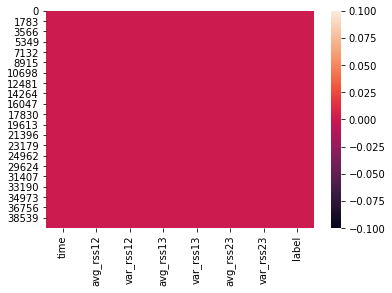

In [58]:
sns.heatmap(df.isnull())

### Replacing zero values with median of particular column

In [203]:
df['avg_rss12'] = df['avg_rss12'].replace(0,df['avg_rss12'].median())
df['var_rss12'] = df['var_rss12'].replace(0,df['var_rss12'].median())
df['avg_rss13'] = df['avg_rss13'].replace(0,df['avg_rss13'].median())
df['var_rss13'] = df['var_rss13'].replace(0,df['var_rss13'].median())
df['avg_rss23'] = df['avg_rss23'].replace(0,df['avg_rss23'].median())
df['var_rss23'] = df['var_rss23'].replace(0,df['var_rss23'].median())

## EDA

### Checking for outliers

<AxesSubplot:>

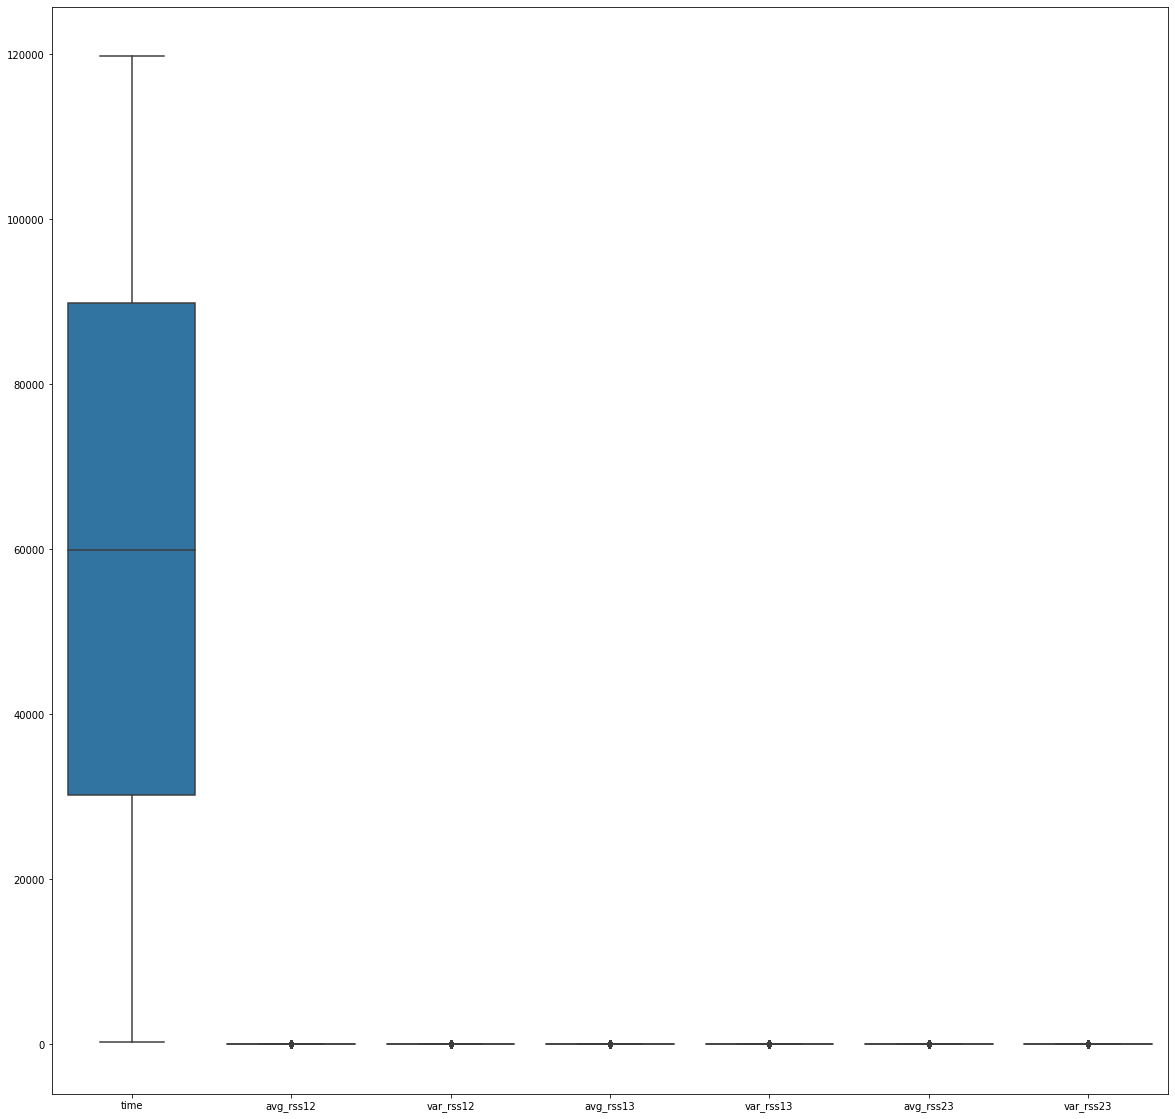

In [76]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df.drop("label", axis = 1), ax = ax)

<AxesSubplot:>

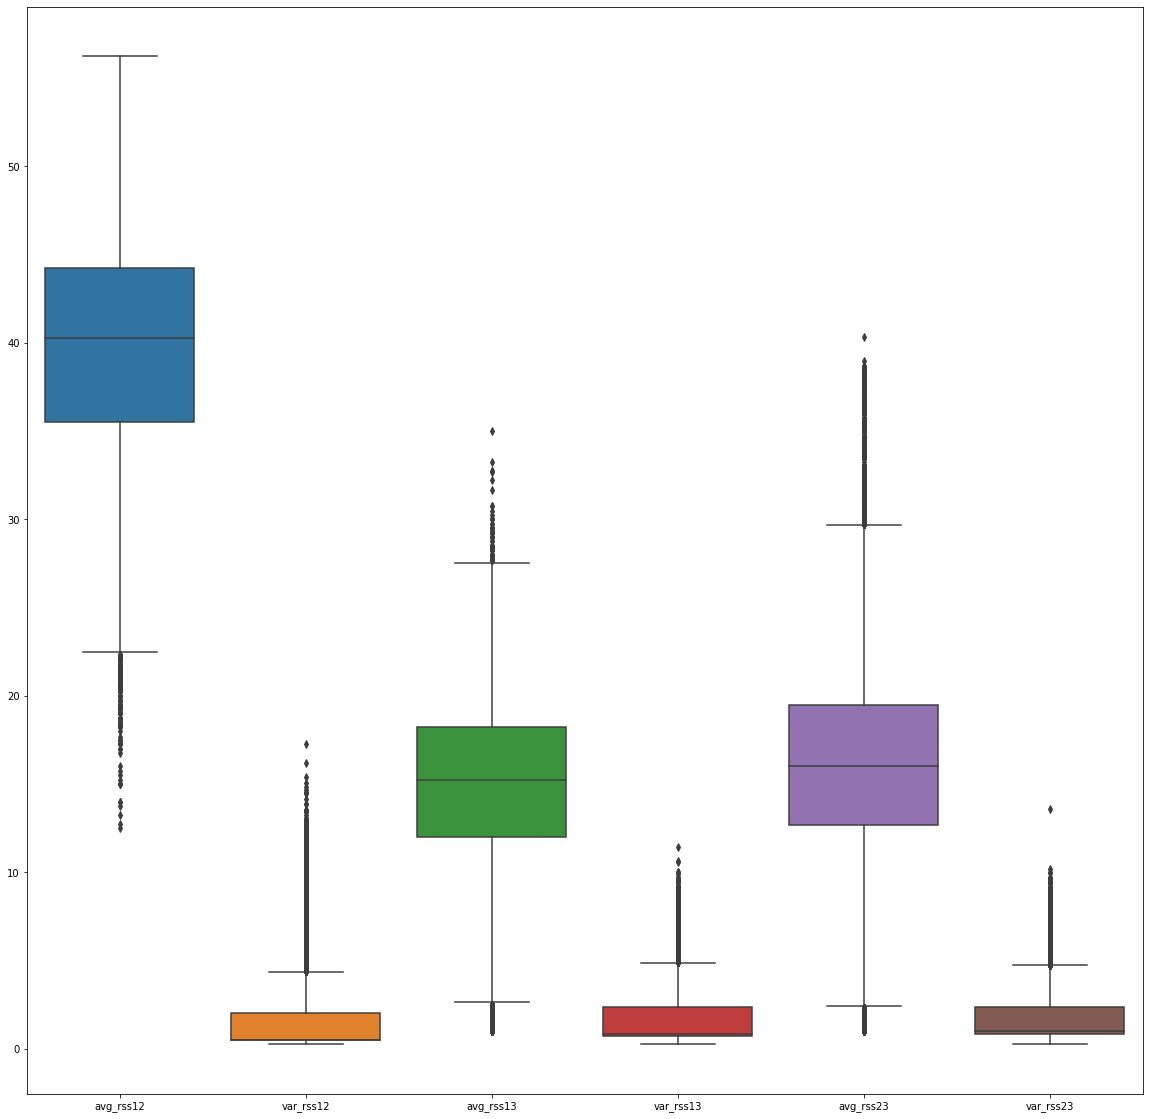

In [77]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df.drop(columns = ["label","time"]), ax = ax)

### Distribution of attributes

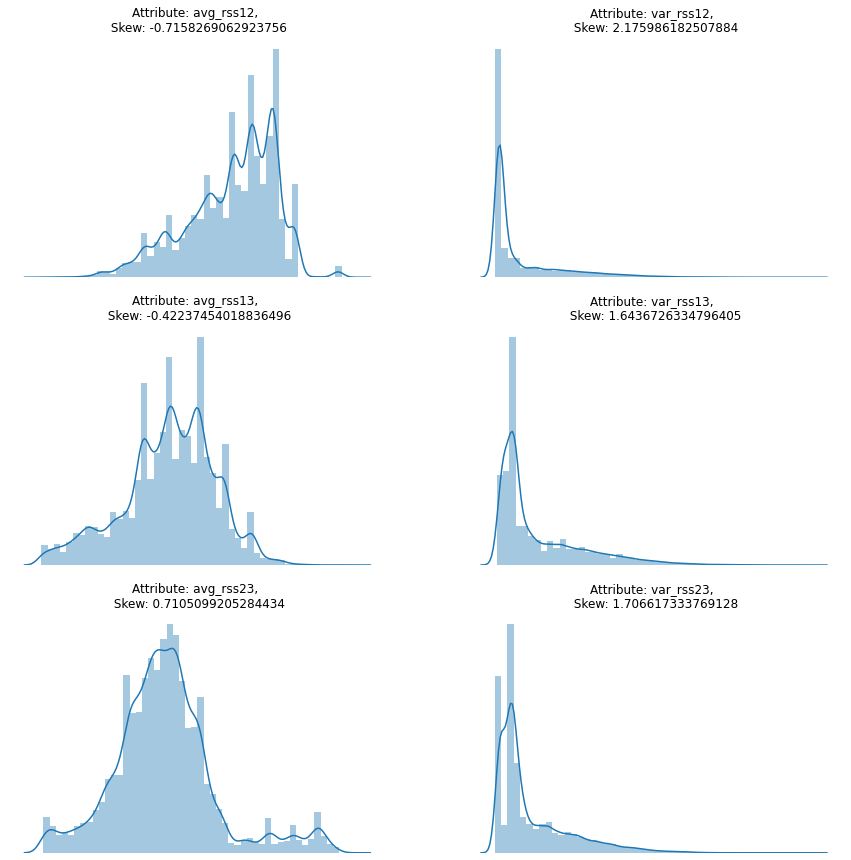

In [91]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.distplot(df["avg_rss12"])
name = "avg_rss12"
skew = df["avg_rss12"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.subplot(3,2,2)
sns.distplot(df["var_rss12"])
name = "var_rss12"
skew = df["var_rss12"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.subplot(3,2,3)
sns.distplot(df["avg_rss13"])
name = "avg_rss13"
skew = df["avg_rss13"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.subplot(3,2,4)
sns.distplot(df["var_rss13"])
name = "var_rss13"
skew = df["var_rss13"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.subplot(3,2,5)
sns.distplot(df["avg_rss23"])
name = "avg_rss23"
skew = df["avg_rss23"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.subplot(3,2,6)
sns.distplot(df["var_rss23"])
name = "var_rss23"
skew = df["var_rss23"].skew()
plt.title(f"Attribute: {name}, \n Skew: {skew}")
plt.axis("off")

plt.show()

## Outliers Removal

- From distribution we are very clear that all distribution are skewed, so we will use IQR method to remove outliers.

In [167]:
df1 = df.copy()

### avg_rss12

In [169]:
df1["avg_rss12"].describe()

count    37440.000000
mean        39.160958
std          6.140294
min         12.500000
25%         35.500000
50%         40.250000
75%         44.250000
max         56.250000
Name: avg_rss12, dtype: float64

In [170]:
q1 = df1["avg_rss12"].quantiletile(0.25)
q3 = df1["avg_rss12"].quantile(0.75)
iqr = q3 - q1
iqr

8.75

In [173]:
upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5

In [174]:
upper_limit

57.375

In [175]:
lower_limit

22.375

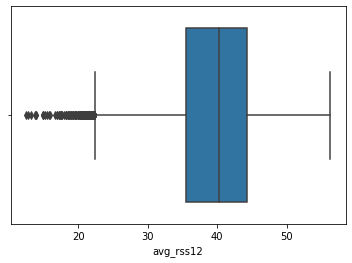

In [177]:
sns.boxplot(df1["avg_rss12"])
plt.show()

In [181]:
df1 = df1[df1["avg_rss12"]>lower_limit]

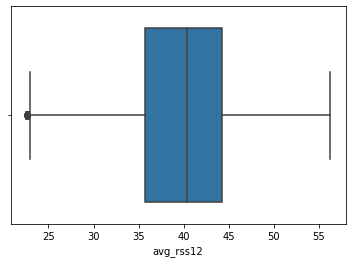

In [183]:
sns.boxplot(df1["avg_rss12"])
plt.show()

### var_rss12

In [184]:
df1["var_rss12"].describe()

count    37127.000000
mean         1.636228
std          2.020430
min          0.260000
25%          0.500000
50%          0.500000
75%          2.050000
max         17.240000
Name: var_rss12, dtype: float64

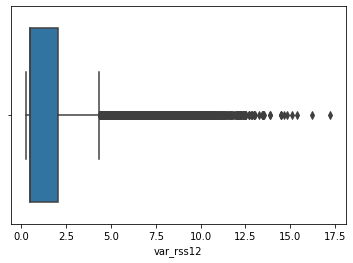

In [187]:
q1 = df1["var_rss12"].quantile(0.25)
q3 = df1["var_rss12"].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + iqr * 1.5
lower_limit = q1 - iqr * 1.5

sns.boxplot(df1["var_rss12"])
plt.show()

In [190]:
df1 = df1[df1["var_rss12"]<upper_limit]
df1

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
2,500.0,34.50,2.60,20.00,4.74,20.50,2.87,walking
4,1000.0,41.25,3.77,15.00,6.63,11.50,2.69,walking
5,1250.0,36.75,1.30,13.50,3.35,15.00,2.55,walking
6,1500.0,37.00,1.22,17.50,4.92,12.50,3.64,walking
9,2250.0,26.00,3.61,15.75,2.95,14.25,6.30,walking
...,...,...,...,...,...,...,...,...
40313,118500.0,38.50,0.50,12.00,3.94,14.00,5.83,cycling
40314,118750.0,42.25,1.09,12.50,3.28,12.00,5.20,cycling
40316,119250.0,31.75,1.30,23.50,1.50,16.25,2.95,cycling
40317,119500.0,31.00,3.24,15.50,4.92,14.75,3.70,cycling


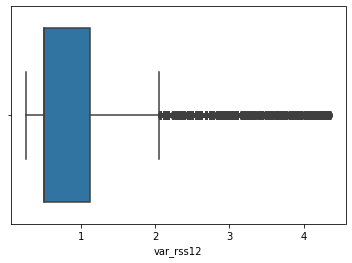

In [191]:
sns.boxplot(df1["var_rss12"])
plt.show()

In this approach we are loosing lots of data and also new outliers are generating, for this time, let proceed with outliers only.

## Model Building

In [204]:
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.25,5.76,14.00,4.36,18.00,2.12,walking
1,250,37.75,5.07,15.50,3.20,14.75,1.79,walking
2,500,34.50,2.60,20.00,4.74,20.50,2.87,walking
3,750,23.75,5.36,11.75,6.22,14.25,3.77,walking
4,1000,41.25,3.77,15.00,6.63,11.50,2.69,walking


In [205]:
df.shape

(37440, 8)

In [206]:
scalar = StandardScaler()

In [207]:
df_scaled = scalar.fit_transform(df.drop("label", axis = 1))

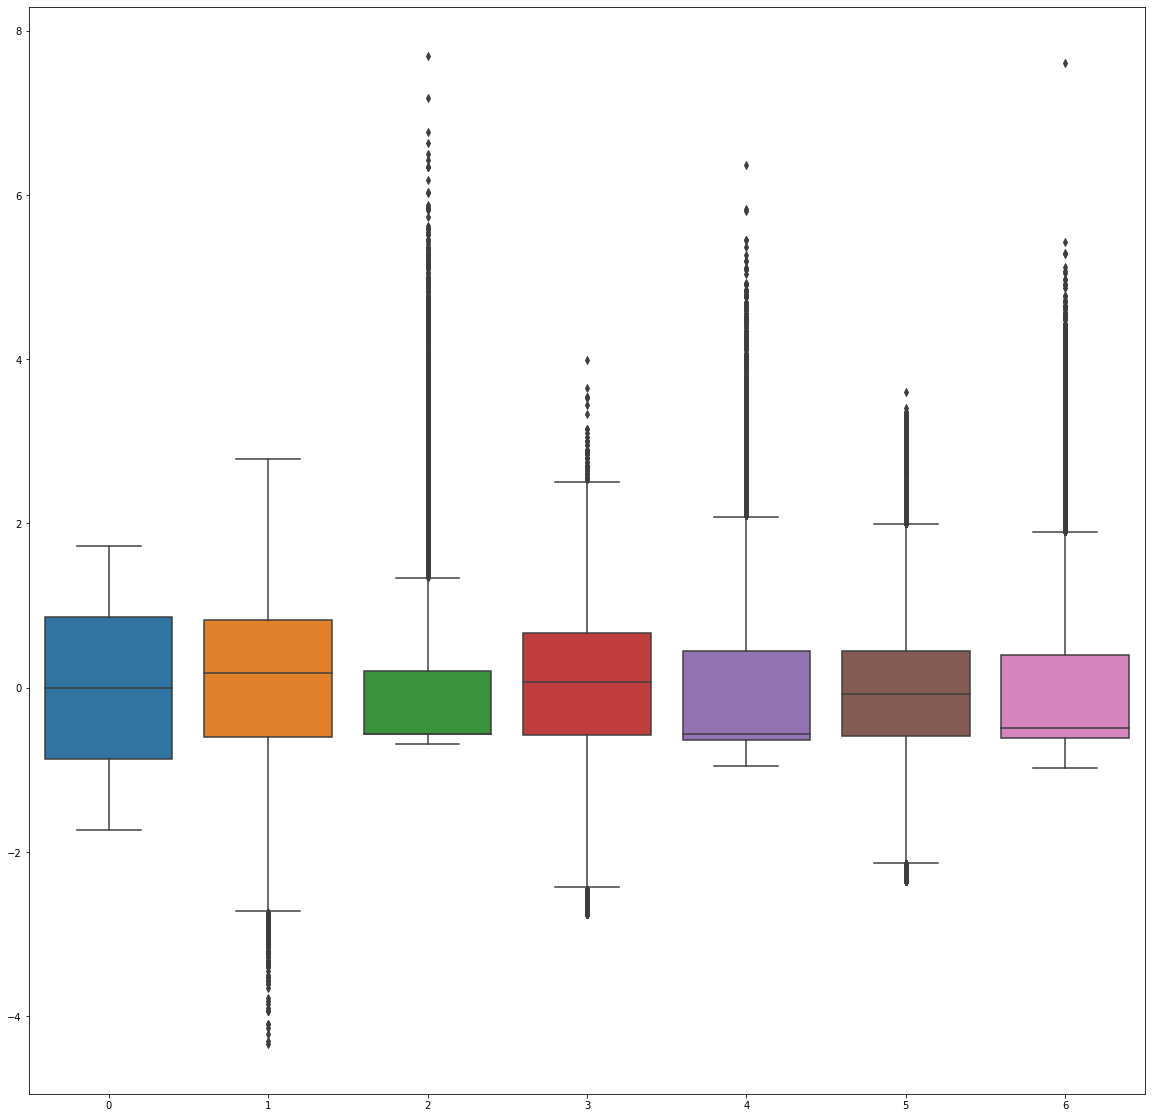

In [210]:
#Box plot after scalling data 

fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_scaled, ax = ax)
plt.show()

### Label Encoding to label attribute

In [212]:
df['label'].unique()

array(['walking', 'standing', 'sitting', 'lying', 'bending1', 'bending2',
       'cycling'], dtype=object)

In [213]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'label'.
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()

array([6, 5, 4, 3, 0, 1, 2])

In [214]:
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,32.25,5.76,14.00,4.36,18.00,2.12,6
1,250,37.75,5.07,15.50,3.20,14.75,1.79,6
2,500,34.50,2.60,20.00,4.74,20.50,2.87,6
3,750,23.75,5.36,11.75,6.22,14.25,3.77,6
4,1000,41.25,3.77,15.00,6.63,11.50,2.69,6


In [215]:
X = df.drop("label", axis = 1)
y = df["label"]

In [219]:
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.72841269e+00, -1.12552429e+00,  2.03105082e+00, ...,
         1.74705207e+00,  2.22941902e-01,  2.29250271e-01],
       [-1.72119590e+00, -2.29789787e-01,  1.69083053e+00, ...,
         9.88592756e-01, -2.68964410e-01,  1.72716461e-02],
       [-1.71397910e+00, -7.59087450e-01,  4.72940518e-01, ...,
         1.99551288e+00,  6.01331372e-01,  7.11019874e-01],
       ...,
       [ 1.71399761e+00, -1.20695470e+00, -1.68054224e-01, ...,
        -1.22942451e-01, -4.19307279e-02,  7.62408631e-01],
       [ 1.72121440e+00, -1.32910032e+00,  7.88507161e-01, ...,
         2.11320485e+00, -2.68964410e-01,  1.24417823e+00],
       [ 1.72843119e+00, -6.69289674e-02, -4.09445401e-04, ...,
         2.76051064e+00, -6.35245418e-01, -3.29602468e-01]])

In [217]:
y

0        6
1        6
2        6
3        6
4        6
        ..
40314    2
40315    2
40316    2
40317    2
40318    2
Name: label, Length: 37440, dtype: int32

### VIF Check

In [222]:
def vif_score(X):
    scaler = StandardScaler()
    arr = scaler.fit_transform(X)
    return pd.DataFrame([[X.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])

In [223]:
vif_score(X)

,FEATURE,VIF_SCORE
0,time,1.000312
1,avg_rss12,1.259713
2,var_rss12,1.714533
3,avg_rss13,1.261428
4,var_rss13,1.594077
5,avg_rss23,1.245944
6,var_rss23,1.638276


### Train Test Split

In [224]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = .20 , random_state = 42)

In [225]:
x_train

array([[-0.03968311, -1.69553716,  0.80329935, ...,  2.21128148,
         0.60133137, -0.4131092 ],
       [ 0.04691841,  0.58451431,  0.13765096, ...,  0.76628571,
         0.03374717,  2.33618933],
       [ 1.49027702, -2.18411962,  2.03105082, ...,  1.40705307,
        -0.68519283,  3.47958919],
       ...,
       [ 0.03248482,  0.95095115, -0.56251253, ..., -0.56101809,
        -0.28107287, -0.83064285],
       [ 1.01396868, -1.93982839,  1.38019462, ...,  1.53128347,
        -0.11760862,  0.46692328],
       [ 1.41810909,  0.78809033, -0.45896722, ..., -0.56101809,
        -2.27442861, -0.81137207]])

In [226]:
x_test

array([[ 0.09021917,  0.29950788, -0.20750005, ...,  0.15167213,
        -0.45815915,  1.89938489],
       [-1.43252417,  0.86952074, -0.56251253, ..., -0.56101809,
         0.67700927, -0.49019234],
       [ 0.48714278,  0.95095115, -0.56251253, ..., -0.56101809,
        -0.63524542, -0.83064285],
       ...,
       [ 1.02840226, -1.49196114, -0.56251253, ..., -0.82255579,
         0.52565348, -0.22682495],
       [-1.64181117, -4.09773425, -0.20750005, ..., -0.82255579,
         1.28243242, -0.67647658],
       [-0.58815938,  0.73434626, -0.19270787, ...,  2.16551239,
         0.2229419 ,  0.0686604 ]])

### Model = Softmax Regression

- The logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.


- In this problem statement, we have multiple classes in our target attribute.

### model using solver == 'lbfgs'

In [273]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=1, penalty='l2', C = 0.6)

In [274]:
model

LogisticRegression(C=0.6, multi_class='multinomial', verbose=1)

In [275]:
 model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


LogisticRegression(C=0.6, multi_class='multinomial', verbose=1)

In [279]:
#prediction using x_test

y_pred = model.predict(x_test)
y_pred

array([2, 4, 5, ..., 1, 1, 2])

In [281]:
#score
model.score(x_test,y_test)

0.6586538461538461

In [282]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 537,    5,    9,    0,  108,    3,    0],
       [  31,  319,   33,   22,   62,    2,   18],
       [   1,    9,  651,    2,   79,   10,  388],
       [   0,   21,    1,  670,   52,  116,    4],
       [  48,   86,   23,  142,  745,  399,    5],
       [   7,    1,   16,   83,  360,  939,   11],
       [   0,   17,  371,    0,    8,    3, 1071]], dtype=int64)

In [283]:
#classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       662
           1       0.70      0.66      0.68       487
           2       0.59      0.57      0.58      1140
           3       0.73      0.78      0.75       864
           4       0.53      0.51      0.52      1448
           5       0.64      0.66      0.65      1417
           6       0.72      0.73      0.72      1470

    accuracy                           0.66      7488
   macro avg       0.68      0.67      0.68      7488
weighted avg       0.66      0.66      0.66      7488



### model using solver == 'newton-cg'

In [294]:
model_1 = LogisticRegression(multi_class='multinomial', solver='newton-cg', verbose=1, penalty='l2', C = 1)

In [295]:
model_1

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg',
                   verbose=1)

In [296]:
model_1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s finished


LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg',
                   verbose=1)

In [297]:
model_1.score(x_test,y_test)

0.6585202991452992

In [298]:
#prediction

y_pred = model_1.predict(x_test)

array([2, 4, 5, ..., 1, 1, 2])

In [299]:
#confusion matrix

confusion_matrix(y_test,y_pred)

array([[ 537,    5,    9,    0,  108,    3,    0],
       [  31,  319,   33,   22,   62,    2,   18],
       [   1,    9,  651,    2,   79,   10,  388],
       [   0,   21,    1,  670,   52,  116,    4],
       [  48,   86,   23,  142,  745,  399,    5],
       [   7,    1,   16,   83,  360,  939,   11],
       [   0,   17,  371,    0,    8,    3, 1071]], dtype=int64)

In [300]:
#classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       662
           1       0.70      0.66      0.68       487
           2       0.59      0.57      0.58      1140
           3       0.73      0.78      0.75       864
           4       0.53      0.51      0.52      1448
           5       0.64      0.66      0.65      1417
           6       0.72      0.73      0.72      1470

    accuracy                           0.66      7488
   macro avg       0.68      0.67      0.68      7488
weighted avg       0.66      0.66      0.66      7488



### model using solver == 'sag'

In [307]:
model_2 = LogisticRegression(multi_class='multinomial', solver='sag', verbose=1, penalty='l2', C = 1,max_iter=100)

In [308]:
model_2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 25 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(C=1, multi_class='multinomial', solver='sag', verbose=1)

In [309]:
model_2.score(x_test,y_test)

0.6585202991452992

In [312]:
#prediction
y_pred = model_2.predict(x_test)
y_pred

array([2, 4, 5, ..., 1, 1, 2])

In [314]:
#classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       662
           1       0.70      0.66      0.68       487
           2       0.59      0.57      0.58      1140
           3       0.73      0.78      0.75       864
           4       0.53      0.51      0.52      1448
           5       0.64      0.66      0.65      1417
           6       0.72      0.73      0.72      1470

    accuracy                           0.66      7488
   macro avg       0.68      0.67      0.68      7488
weighted avg       0.66      0.66      0.66      7488



### model using solver == "saga"

In [334]:
model_3 = LogisticRegression(multi_class='multinomial', solver='saga', verbose=1, penalty='elasticnet', max_iter=1000, l1_ratio=0.5)

In [335]:
model_3

LogisticRegression(l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', solver='saga', verbose=1)

In [336]:
model_3.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 201 epochs took 30 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.3s finished


LogisticRegression(l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', solver='saga', verbose=1)

In [337]:
model_3.score(x_test,y_test)

0.6585202991452992

In [338]:
#prediction

y_pred = model_3.predict(x_test)

In [339]:
#classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       662
           1       0.70      0.66      0.68       487
           2       0.59      0.57      0.58      1140
           3       0.73      0.78      0.75       864
           4       0.53      0.51      0.52      1448
           5       0.64      0.66      0.65      1417
           6       0.72      0.73      0.72      1470

    accuracy                           0.66      7488
   macro avg       0.68      0.67      0.68      7488
weighted avg       0.66      0.66      0.66      7488



Here i have used all solver which we can use for multiclass classification problem and in all solver i am getting approximately same accuracy. May accuracy can increase if we will do some hyperparameter tuning.